In [ ]:
!pip install numpy  # Install NumPy
!pip install tensorflow  # Install TensorFlow

import numpy as np  # Import NumPy
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf  # Import TensorFlow
tf.compat.v1.set_random_seed(2019)

In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0



In [ ]:

from sklearn.model_selection import train_test_split
train_ratio = 0.6
validation_ratio = 0.2  # 20% for validation and testing
test_ratio = 0.2
random_state = 42  # For reproducibility


# Split the data into training and the rest (validation + test)
train_images, rest_images, train_labels, rest_labels = train_test_split(
    train_images, train_labels, test_size=1 - train_ratio, random_state=42)

# Split the rest into validation and test sets
validation_images, test_images, validation_labels, test_labels = train_test_split(
    rest_images, rest_labels, test_size=test_ratio / (validation_ratio + test_ratio), random_state=42)


In [ ]:




# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),  # Batch normalization after the first Conv2D layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),  # Batch normalization after the second Conv2D layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),  # Batch normalization after the third Conv2D layer
    tf.keras.layers.MaxPooling2D((2, 2)),
])

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())  # Batch normalization after the first fully connected layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())  # Batch normalization after the second fully connected layer
model.add(tf.keras.layers.Dropout(0.2))  # Adding dropout with a rate of 0.23
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 units and softmax activation


# Compile the model with a custom learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)  # Set the learning rate as 0.01
model.compile(optimizer=custom_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:

# Train the model
model.fit(train_images, train_labels, epochs=20,batch_size=256,
          validation_data=(train_images, train_labels))

Epoch 1/20
118/118 [==============================] - 117s 975ms/step - loss: 1.4621 - accuracy: 0.4915 - val_loss: 3.8958 - val_accuracy: 0.1021
Epoch 2/20
118/118 [==============================] - 98s 829ms/step - loss: 1.0133 - accuracy: 0.6427 - val_loss: 3.0261 - val_accuracy: 0.2087
Epoch 3/20
118/118 [==============================] - 116s 984ms/step - loss: 0.8193 - accuracy: 0.7122 - val_loss: 1.8199 - val_accuracy: 0.3779
Epoch 4/20
118/118 [==============================] - 116s 985ms/step - loss: 0.6703 - accuracy: 0.7661 - val_loss: 1.0154 - val_accuracy: 0.6422
Epoch 5/20
118/118 [==============================] - 96s 813ms/step - loss: 0.5447 - accuracy: 0.8126 - val_loss: 0.7726 - val_accuracy: 0.7252
Epoch 6/20
118/118 [==============================] - 95s 805ms/step - loss: 0.4442 - accuracy: 0.8455 - val_loss: 0.5400 - val_accuracy: 0.8136
Epoch 7/20
118/118 [==============================] - 95s 807ms/step - loss: 0.3334 - accuracy: 0.8849 - val_loss: 0.2748 - val

# New section

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 8s 25ms/step - loss: 1.4570 - accuracy: 0.7176
Test loss: 1.456987738609314
Test accuracy: 0.7175999879837036


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Get predictions for test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision and recall
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")


313/313 [==============================] - 7s 22ms/step
Confusion Matrix:
[[801  23  73  14  14   9  10  14  24  26]
 [ 26 876  15   7   7   4  14   3  28  46]
 [ 60   4 726  56  46  38  66  17   5   4]
 [ 28   6  99 541  46 150  98  28  12  12]
 [ 33   8 107  58 630  39  48  39   3   5]
 [ 17   4  64 192  38 602  48  29   3   6]
 [  8   4  69  39  27  16 818   0   7   2]
 [ 15   7  34  61  62  67  14 722   0   6]
 [115  34  25  10   8   9  22   2 723  12]
 [ 34 119  16  18   6  21  17  10  35 737]]
Precision: 0.7245504411555586
Recall: 0.7176


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


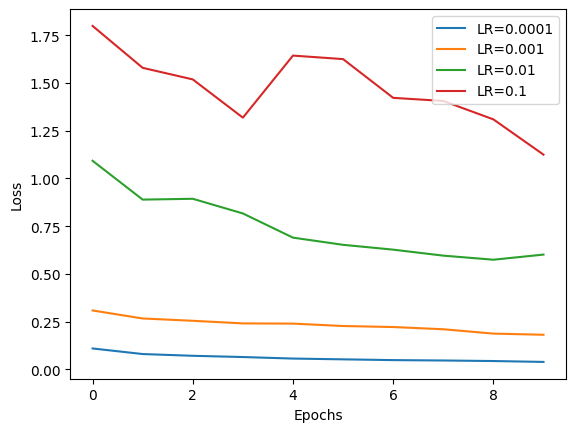

In [ ]:
import matplotlib.pyplot as plt

learning_rates = [0.0001, 0.001, 0.01, 0.1]
for lr in learning_rates:
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=custom_optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=0)
    plt.plot(history.history['loss'], label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
